<a href="https://colab.research.google.com/github/AmitS1009/ML_Projects/blob/main/Quora_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv('questions.csv')

In [56]:
data.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
357220,357220,699557,699558,Do Japanese like Indian food?,Do Japanese people have an appetite for Indian...,1
119816,119816,237455,237456,How are the laws regarding self defense weapon...,How are the laws regarding self defense weapon...,0
51712,51712,102910,102911,What would happen if Hillary Clinton was indic...,"Legally, what happens if Clinton is indicted b...",1
296047,296047,581533,581534,Do some people not have dandruffs?,What is dandruff?,0
227891,227891,449110,449111,Can a woman who had a hysterectomy donate eggs?,Can a woman donate all of her eggs?,0


In [57]:
data.shape

(404351, 6)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [59]:
data.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [60]:
data.duplicated().sum()

0

is_duplicate
0    255045
1    149306
Name: count, dtype: int64


is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

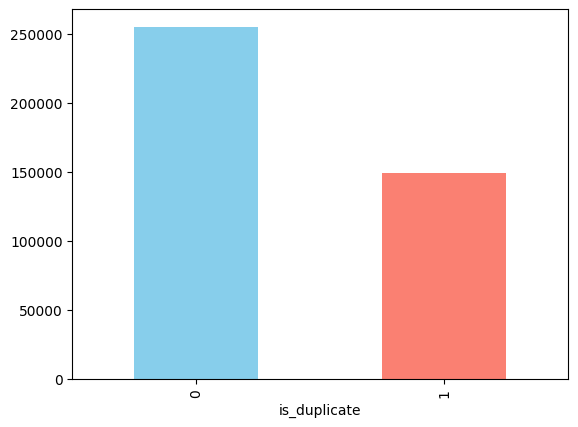

In [61]:
# distribution of duplicate and non-duplicate questions

print(data['is_duplicate'].value_counts())
print('\n')
print((data['is_duplicate'].value_counts()/data['is_duplicate'].count())*100)

data['is_duplicate'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])


In [62]:
# repeated question :

qid = pd.Series(data['qid1'].tolist()+data['qid2'].tolist())
print('Number of unique Question :', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of repeated Question :', x[x].shape[0])

Number of unique Question : 789801
Number of repeated Question : 13698


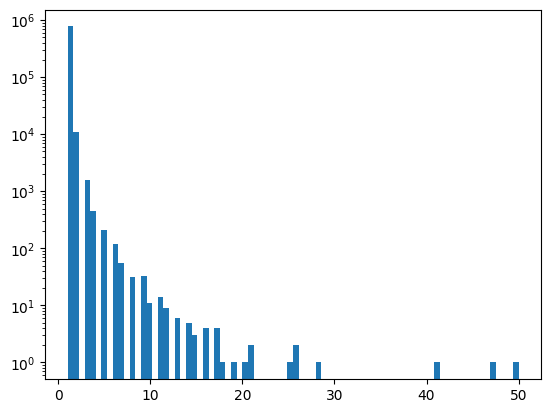

In [63]:
# repeated ques histogram :

plt.hist(qid.value_counts().values, bins = 80)
plt.yscale('log')
plt.show()

In [66]:
new_data = data.sample(50000, random_state = 2)

In [71]:
# repeated question :

new_qid = pd.Series(new_data['qid1'].tolist()+new_data['qid2'].tolist())
print('Number of unique Question :', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of repeated Question :', x[x].shape[0])

Number of unique Question : 99520
Number of repeated Question : 415


In [72]:
new_data.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [73]:
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


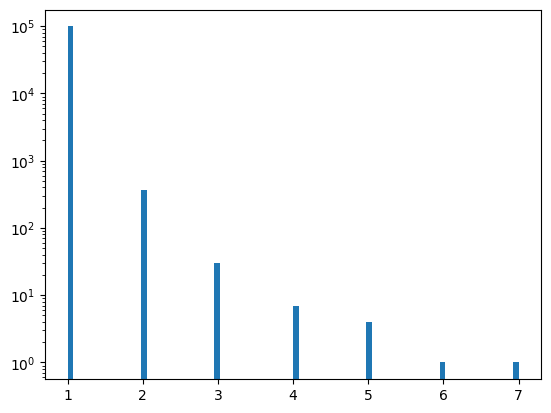

In [75]:
# repeated ques histogram :

plt.hist(new_qid.value_counts().values, bins = 80)
plt.yscale('log')
plt.show()

In [77]:
# featute engineer :

new_data['q1_len'] = new_data['question1'].str.len()
new_data['q2_len'] = new_data['question2'].str.len()

In [78]:
new_data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105


In [79]:
# question number words

new_data['q1_num_words'] = new_data['question1'].apply(lambda row : len(row.split(' ')))
new_data['q2_num_words'] = new_data['question2'].apply(lambda row : len(row.split(' ')))


In [80]:
new_data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22


In [95]:
# common words:

def common_words(row):
  w1 = set(map(lambda word : word.strip(), row['question1'].split(" ")))
  w2 = list(map(lambda word: word.strip(), row['question2'].split(" ")))

  return len(w1 & w2)

In [98]:
new_data['common_word'] = new_data.apply(common_words, axis = 1)

In [99]:
new_data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,19
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,33


In [97]:
# total words:

def common_words(row):
  w1 = set(map(lambda word : word.strip(), row['question1'].split(" ")))
  w2 = list(map(lambda word: word.strip(), row['question2'].split(" ")))

  return len(w1) + len(w2)

In [101]:
new_data['total_words'] = new_data.apply(common_words, axis = 1)

In [102]:
new_data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,19,19
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,33,33


In [103]:
new_data['word_share'] = round(new_data['common_word']/new_data['total_words'], 2)

In [109]:
new_data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,19,19,1.0
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,33,33,1.0


Analysis of features :

max char : 332
min char : 2
avg char : 59.64404




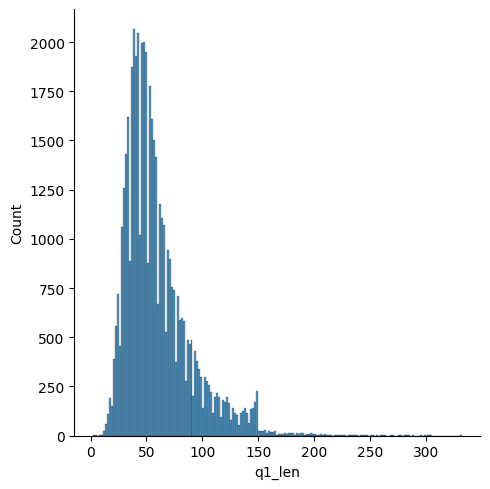

In [115]:
sns.displot(new_data['q1_len'])
print('max char :', new_data['q1_len'].max())
print('min char :', new_data['q1_len'].min())
print('avg char :', new_data['q1_len'].mean())

print('\n')

max char : 1151
min char : 2
avg char : 60.06522




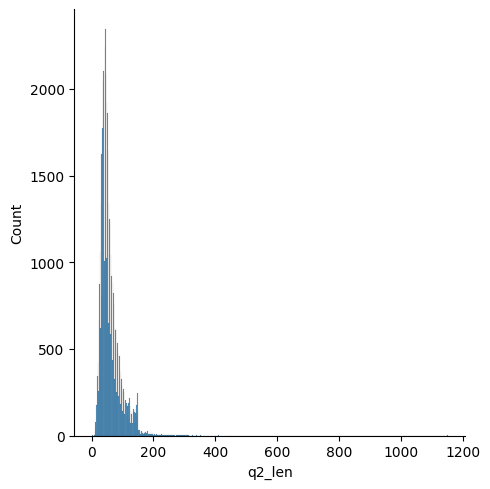

In [131]:
sns.displot(new_data['q2_len'])
print('max char :', new_data['q2_len'].max())
print('min char :', new_data['q2_len'].min())
print('avg char :', new_data['q2_len'].mean())

print('\n')

max words : 64
min words : 1
avg words : 10.97768


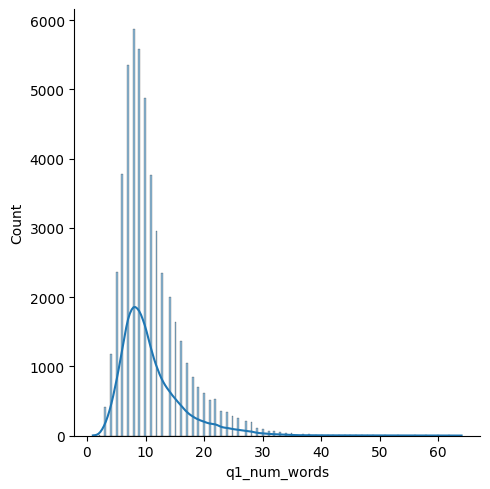

In [135]:
sns.displot(new_data['q1_num_words'])
print('max words :', new_data['q1_num_words'].max())
print('min words :', new_data['q1_num_words'].min())
print('avg words :', new_data['q1_num_words'].mean())

max words : 237
min words : 1
avg words : 11.1784


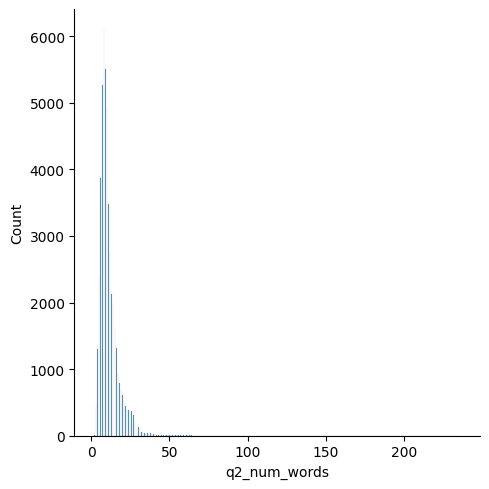

In [132]:
sns.displot(new_data['q2_num_words'])
print('max words :', new_data['q2_num_words'].max())
print('min words :', new_data['q2_num_words'].min())
print('avg words :', new_data['q2_num_words'].mean())

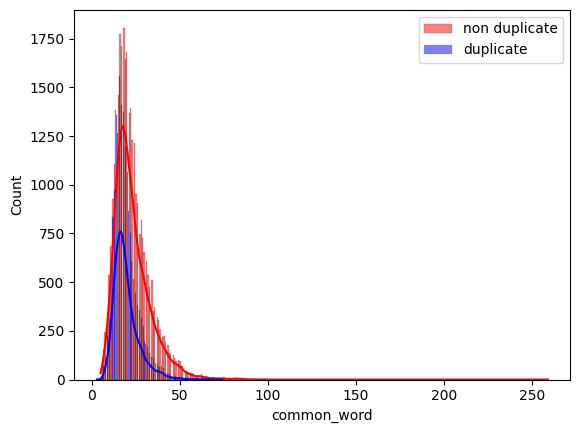

In [137]:
sns.histplot(new_data[new_data['is_duplicate'] == 0]['common_word'], label='non duplicate', color='red', kde=True)
sns.histplot(new_data[new_data['is_duplicate'] == 1]['common_word'], label='duplicate', color='blue', kde=True)


plt.legend()
plt.show()


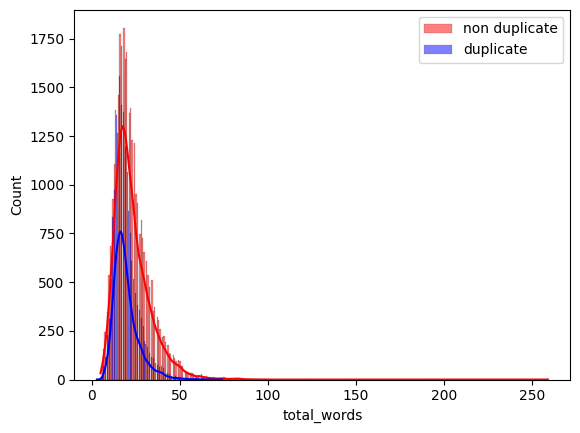

In [134]:
# total words :

sns.histplot(new_data[new_data['is_duplicate'] == 0]['total_words'], label='non duplicate', color='red', kde=True)
sns.histplot(new_data[new_data['is_duplicate'] == 1]['total_words'], label='duplicate', color='blue', kde=True)


plt.legend()
plt.show()

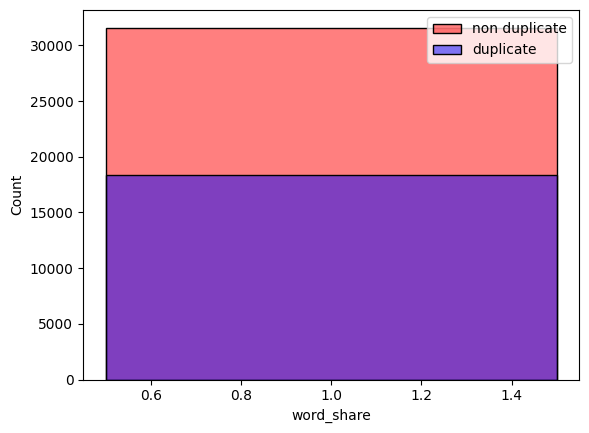

In [141]:
# word share :

sns.histplot(new_data[new_data['is_duplicate'] == 0]['word_share'], label='non duplicate', color='red', kde=True)
sns.histplot(new_data[new_data['is_duplicate'] == 1]['word_share'], label='duplicate', color='blue', kde=True)


plt.legend()
plt.show()

<ipython-input-148-e86b1ea79d53>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[new_data['is_duplicate'] == 1]['word_share'], label = 'duplicate')
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-148-e86b1ea79d53>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an a

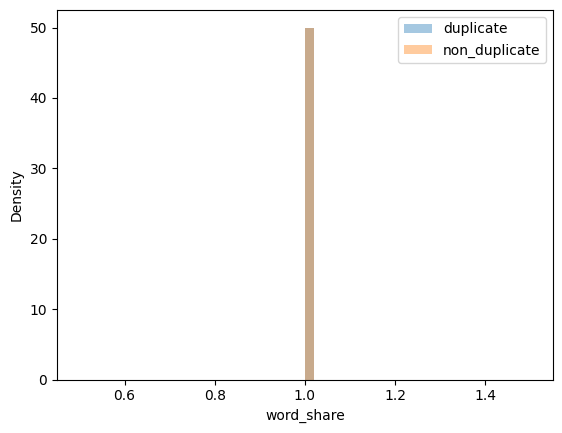

In [148]:
sns.distplot(new_data[new_data['is_duplicate'] == 1]['word_share'], label = 'duplicate')
sns.distplot(new_data[new_data['is_duplicate'] == 0]['word_share'], label = 'non_duplicate')
plt.legend()
plt.show()

In [172]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [173]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization to a sentence
def apply_lemmatization(sentence):
    words = nltk.word_tokenize(sentence)  # Tokenizing the sentence into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatizing each word
    return ' '.join(lemmatized_words)  # Joining the lemmatized words back into a sentence


In [169]:
new_data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share,question1_vec,question2_vec,question1_stemmed,question2_stemmed
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,19,19,1.0,"[-0.3534766, 0.6443928, 0.34705696, 0.28096718...","[-0.2444586, 0.30823147, 0.33153284, 0.1588709...",whi wa cyru mistri remov as the chairman of ta...,whi did the tata son sack cyru mistri ?
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,33,33,1.0,"[-0.20350043, 0.47722995, 0.0967462, -0.105952...","[-0.36298737, 0.5006827, 0.14246123, 0.1836046...",by what age would you think a man should be ma...,when my wrist is extend i feel a shock and bur...


In [174]:
new_data.head(2)

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share,question1_stemmed,question2_stemmed
339499,339499,665522,665523,1,58,42,11,8,19,19,1.0,whi wa cyru mistri remov as the chairman of ta...,whi did the tata son sack cyru mistri ?
289521,289521,568878,568879,0,52,105,11,22,33,33,1.0,by what age would you think a man should be ma...,when my wrist is extend i feel a shock and bur...


Applying Word to Vec :

In [155]:
pip install gensim


In [156]:
from gensim.models import Word2Vec

In [159]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [160]:
# Tokenize the questions into words
tokenized_questions = [nltk.word_tokenize(str(question)) for question in new_data['question1']]

# Train the Word2Vec model
model = Word2Vec(tokenized_questions, vector_size=100, window=5, min_count=1, workers=4)

# Get vector for a specific word (for example, 'how')
word_vector = model.wv['how']
print(word_vector)

# To get the vector for the whole sentence (average of word vectors)
def get_sentence_vector(sentence):
    words = nltk.word_tokenize(sentence)
    vector = [model.wv[word] for word in words if word in model.wv]
    return sum(vector) / len(vector) if vector else None


[ 4.5537972e-01  9.3958426e-01  1.3361853e+00 -1.7683449e-01
  7.4798107e-01 -3.8246822e-01  1.3986230e+00  2.6402392e+00
  2.2622311e-01 -1.9256343e+00 -1.6903040e+00 -1.8863299e+00
  8.5605460e-01  9.6515548e-01  1.2323955e+00 -1.4944590e+00
  9.9377209e-01  6.5984577e-01 -4.8258409e-02 -4.1094270e+00
  2.1336641e+00  1.0975871e+00  2.0479828e-01  2.1331941e-03
  7.3638968e-02  1.2415507e+00 -2.8547221e-01 -5.1354891e-01
 -2.9775066e+00 -2.2681947e+00 -1.3393174e-01 -9.0110689e-02
 -9.8793560e-01 -2.2100933e+00 -2.2079251e+00 -1.3916888e+00
 -1.5490770e+00 -4.5513451e-01 -9.6741867e-01  3.9504504e-01
  2.1130068e+00  6.5626413e-02  2.0599611e+00 -1.3769283e+00
  1.7364852e+00  1.3719572e+00 -1.0545933e+00 -1.5815283e+00
 -1.0973265e+00  1.1223578e-01 -1.2358745e+00 -1.6768392e+00
 -5.9486592e-01 -1.6560099e+00  3.7299030e+00 -1.9879904e+00
 -7.7473199e-01  3.8735229e-01 -2.0541382e+00  8.3439499e-01
 -9.1428792e-01 -3.1748140e+00  1.1596595e+00  9.0412956e-01
 -1.6696671e+00  1.85799

In [177]:
new_data['question1_vec'] = new_data['question1_stemmed'].apply(lambda x: get_sentence_vector(x))

In [176]:
new_data['question2_vec'] = new_data['question2_stemmed'].apply(lambda x: get_sentence_vector(x))

In [178]:
new_data.shape

(50000, 15)

In [179]:
new_data.head(2)

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share,question1_stemmed,question2_stemmed,question2_vec,question1_vec
339499,339499,665522,665523,1,58,42,11,8,19,19,1.0,whi wa cyru mistri remov as the chairman of ta...,whi did the tata son sack cyru mistri ?,"[-0.054550577, 0.16564593, 0.72488725, 0.25439...","[-0.33741546, 0.44817662, 0.38185224, 0.424317..."
289521,289521,568878,568879,0,52,105,11,22,33,33,1.0,by what age would you think a man should be ma...,when my wrist is extend i feel a shock and bur...,"[-0.31861287, 0.5950458, 0.24578185, 0.1831772...","[-0.16364913, 0.5680821, 0.15118706, -0.028163..."


In [182]:
new_data.drop(['question1_stemmed', 'question2_stemmed'], axis = 1, inplace = True)

KeyError: "['question1_stemmed', 'question2_stemmed'] not found in axis"

In [181]:
new_data.head(2)

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share,question2_vec,question1_vec
339499,339499,665522,665523,1,58,42,11,8,19,19,1.0,"[-0.054550577, 0.16564593, 0.72488725, 0.25439...","[-0.33741546, 0.44817662, 0.38185224, 0.424317..."
289521,289521,568878,568879,0,52,105,11,22,33,33,1.0,"[-0.31861287, 0.5950458, 0.24578185, 0.1831772...","[-0.16364913, 0.5680821, 0.15118706, -0.028163..."


In [184]:
new_data.drop(['id', 'qid1', 'qid2'], axis=1, inplace=True)


In [186]:
new_data.head(2)

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share,question2_vec,question1_vec
339499,1,58,42,11,8,19,19,1.0,"[-0.054550577, 0.16564593, 0.72488725, 0.25439...","[-0.33741546, 0.44817662, 0.38185224, 0.424317..."
289521,0,52,105,11,22,33,33,1.0,"[-0.31861287, 0.5950458, 0.24578185, 0.1831772...","[-0.16364913, 0.5680821, 0.15118706, -0.028163..."


In [187]:
X = new_data.drop('is_duplicate', axis = 1)
y = new_data['is_duplicate']

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [192]:
new_data[['q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'common_word', 'total_words', 'word_share']] = scaler.fit_transform(
    new_data[['q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'common_word', 'total_words', 'word_share']])

In [193]:
new_data.head(2)

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share,question2_vec,question1_vec
339499,1,0.169697,0.034813,0.15873,0.029661,0.062500,0.062500,0.0,"[-0.054550577, 0.16564593, 0.72488725, 0.25439...","[-0.33741546, 0.44817662, 0.38185224, 0.424317..."
289521,0,0.151515,0.089643,0.15873,0.088983,0.117188,0.117188,0.0,"[-0.31861287, 0.5950458, 0.24578185, 0.1831772...","[-0.16364913, 0.5680821, 0.15118706, -0.028163..."


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (50000,) + inhomogeneous part.

In [189]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.metrics import accuracy_score, classification_report

In [204]:
# Convert to numpy arrays
X = np.array(X_train)
y = np.array(y_train)

In [205]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer (sigmoid for binary classification)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [206]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [207]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

ValueError: setting an array element with a sequence.

In [208]:
print(X_train.dtypes)


q1_len             int64
q2_len             int64
q1_num_words       int64
q2_num_words       int64
common_word        int64
total_words        int64
word_share       float64
question2_vec     object
question1_vec     object
dtype: object


In [210]:
embedding_size = 300  # Assuming the embedding vectors are of size 300


In [211]:
# Convert list-like object columns to numpy arrays
X_train['question1_vec'] = X_train['question1_vec'].apply(lambda x: np.array(x) if isinstance(x, list) else np.zeros(embedding_size))
X_train['question2_vec'] = X_train['question2_vec'].apply(lambda x: np.array(x) if isinstance(x, list) else np.zeros(embedding_size))

# Now, flatten the columns
X_train_question1_vec = np.array(X_train['question1_vec'].tolist())
X_train_question2_vec = np.array(X_train['question2_vec'].tolist())

# Add these flattened columns to X_train
X_train = X_train.drop(columns=['question1_vec', 'question2_vec'])
X_train = np.hstack([X_train, X_train_question1_vec, X_train_question2_vec])


In [215]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(607,)),  # Adjust input size to match the number of features
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [217]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6191 - loss: 0.6440 - val_accuracy: 0.6156 - val_loss: 0.6326
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6311 - loss: 0.6316 - val_accuracy: 0.6233 - val_loss: 0.6245
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6295 - loss: 0.6309 - val_accuracy: 0.6261 - val_loss: 0.6293
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6344 - loss: 0.6266 - val_accuracy: 0.6290 - val_loss: 0.6209
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6309 - loss: 0.6299 - val_accuracy: 0.6254 - val_loss: 0.6300
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6264 - loss: 0.6339 - val_accuracy: 0.6301 - val_loss: 0.6210
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6270 - loss: 0.6290 - val_accuracy: 0.6283 - val_loss: 0.6210
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6314 - loss: 0.6278 - 